In [16]:
import geopandas as gpd
import pandas as pd

In [17]:
gdf_dxf = gpd.read_file('GIS/bases-DXF/Bairro Jardim Pinheiros.dxf', encoding='ANSI_1252')

In [18]:
gdf_dxf['logradouro'] = gdf_dxf.Layer.str.encode(encoding='raw_unicode_escape').str.decode(encoding='utf-8').str[0:-11]

In [19]:
gdf_dxf['FileName'] = gdf_dxf.Layer.str.encode(encoding='raw_unicode_escape').str.decode(encoding='utf-8').str[-8:] + '.MOV'

In [20]:
gdf_dxf.columns

Index(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text',
       'geometry', 'logradouro', 'FileName'],
      dtype='object')

In [25]:
gdf_dxf['path-arquivo'] = 'videos/' + gdf_dxf.FileName

In [31]:
links_file = open('./videos/link-videos.txt', 'r')
l = []

for line in links_file:
    l.append([line[0:8].replace(' ', '_') + '.MOV', line[9:20]])

In [32]:
gdf_dxf.set_index('FileName', inplace=True)

In [33]:
gdf_dxf['YouTube-Link'] = pd.DataFrame(l, columns=['FileName', 'YouTube-Link']).set_index('FileName')['YouTube-Link']

In [34]:
gdf_dxf['URL-YouTube'] = 'https://www.youtube.com/watch?v=' + gdf_dxf['YouTube-Link']

<AxesSubplot:>

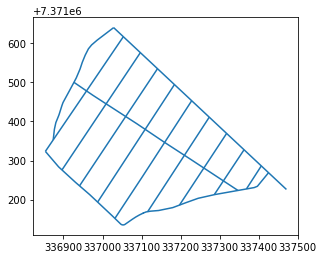

In [35]:
gdf_dxf.plot()

In [36]:
gdf_dxf.drop(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text'], axis=1).to_file('./videos/linhas-de-voo-retificadas.gpkg', driver='GPKG')